In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

In [77]:
data=pd.read_csv('vanilla.csv')

In [78]:
data.select_dtypes(include=['object']).columns
categ_var=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','poutcome', 'y']

In [79]:
data.select_dtypes(include=['int64']).columns
nume_var=['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

#Data pre-processing


In [80]:
#campaign outlier removal
max_thresold = data['campaign'].quantile(0.99)
max_thresold
data["campaign"] = data["campaign"].apply(lambda x: max_thresold if x > max_thresold else x)

In [81]:
max_thresold = data['pdays'].quantile(0.99)
max_thresold
data["pdays"] = data["pdays"].apply(lambda x: max_thresold if x > max_thresold else x)

In [82]:
max_thresold = data['previous'].quantile(0.99)
max_thresold
data["previous"] = data["previous"].apply(lambda x: max_thresold if x > max_thresold else x)

In [83]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
data[nume_var] = scaler.fit_transform(data[nume_var])

In [84]:
contact = pd.get_dummies(data.contact, drop_first=True, prefix = 'contact')
job = pd.get_dummies(data.job, drop_first=True, prefix = 'job')
marital = pd.get_dummies(data.marital, drop_first=True, prefix = 'marital')
default = pd.get_dummies(data.default, drop_first=True, prefix = 'default')
education = pd.get_dummies(data.education, drop_first=True, prefix = 'education')
housing = pd.get_dummies(data.housing, drop_first=True, prefix = 'housing')
loan = pd.get_dummies(data.loan, drop_first=True, prefix = 'loan')
y = pd.get_dummies(data.y, drop_first=True, prefix = 'y')
poutcome = pd.get_dummies(data.poutcome, drop_first=True, prefix = 'poutcome')

In [85]:
data = pd.concat([data, job,marital,education, housing,loan, contact, default, poutcome, y ], axis=1) #no default
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,education_unknown,housing_yes,loan_yes,contact_telephone,contact_unknown,default_yes,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,0.373134,technician,married,secondary,no,0.064773,yes,no,cellular,0.433333,...,0,1,0,0,0,0,0,0,1,0
1,0.253731,entrepreneur,married,primary,no,0.056687,no,yes,telephone,0.666667,...,0,0,1,1,0,0,0,0,1,0
2,0.208955,technician,single,tertiary,no,0.087998,no,no,cellular,0.233333,...,0,0,0,0,0,0,0,0,1,0
3,0.641791,retired,married,tertiary,no,0.126307,yes,no,cellular,0.300000,...,0,1,0,0,0,0,0,1,0,1
4,0.104478,admin.,single,secondary,no,0.070491,yes,no,cellular,0.466667,...,0,1,0,0,0,0,0,0,0,1


In [86]:
data.drop(['contact', 'job', 'marital','housing','loan', 'education', 'poutcome','default', 'y'], axis = 1, inplace = True) #no default
data.drop(['duration'], axis=1, inplace= True)
data.drop(['job_unknown'], axis=1, inplace= True)
data.drop(['poutcome_other'], axis=1, inplace= True)
data.drop(['poutcome_unknown'], axis=1, inplace= True)
data.drop(['default_yes'], axis=1, inplace= True)
data.drop(['education_unknown'], axis=1, inplace= True) 

In [87]:
data

,age,balance,day,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,marital_married,marital_single,education_secondary,education_tertiary,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_success,y_yes
0,0.373134,0.064773,0.433333,0.1250,0.000000,0.000,0,0,0,0,...,1,0,1,0,1,0,0,0,0,0
1,0.253731,0.056687,0.666667,0.5625,0.000000,0.000,0,1,0,0,...,1,0,0,0,0,1,1,0,0,0
2,0.208955,0.087998,0.233333,0.0625,0.000000,0.000,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0.641791,0.126307,0.300000,0.0625,0.250000,0.625,0,0,0,0,...,1,0,0,1,1,0,0,0,1,1
4,0.104478,0.070491,0.466667,0.0000,0.989247,0.375,0,0,0,0,...,0,1,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.582090,0.108963,0.600000,0.0625,0.000000,0.000,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3996,0.179104,0.077815,0.966667,0.0625,0.000000,0.000,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
3997,0.194030,0.056687,0.166667,0.0625,0.000000,0.000,1,0,0,0,...,0,1,1,0,1,0,0,1,0,0
3998,0.194030,0.094996,0.166667,0.1250,0.000000,0.000,1,0,0,0,...,1,0,1,0,1,0,0,0,0,0


In [88]:
data

,age,balance,day,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,marital_married,marital_single,education_secondary,education_tertiary,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_success,y_yes
0,0.373134,0.064773,0.433333,0.1250,0.000000,0.000,0,0,0,0,...,1,0,1,0,1,0,0,0,0,0
1,0.253731,0.056687,0.666667,0.5625,0.000000,0.000,0,1,0,0,...,1,0,0,0,0,1,1,0,0,0
2,0.208955,0.087998,0.233333,0.0625,0.000000,0.000,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0.641791,0.126307,0.300000,0.0625,0.250000,0.625,0,0,0,0,...,1,0,0,1,1,0,0,0,1,1
4,0.104478,0.070491,0.466667,0.0000,0.989247,0.375,0,0,0,0,...,0,1,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.582090,0.108963,0.600000,0.0625,0.000000,0.000,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3996,0.179104,0.077815,0.966667,0.0625,0.000000,0.000,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
3997,0.194030,0.056687,0.166667,0.0625,0.000000,0.000,1,0,0,0,...,0,1,1,0,1,0,0,1,0,0
3998,0.194030,0.094996,0.166667,0.1250,0.000000,0.000,1,0,0,0,...,1,0,1,0,1,0,0,0,0,0


In [89]:
X=data.iloc[:, 0:25]
y=data.iloc[:, 25:26]

In [90]:

folds = KFold(n_splits=5, shuffle=True, random_state=42)

In [91]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) 

#Section B Exploration- Decision Tree

In [92]:

cldt = tree.DecisionTreeClassifier(max_depth=4, random_state=24)

print("Accuracy:",np.mean(cross_val_score(cldt, X, y, scoring='accuracy', cv=folds)))
print('Precision', np.mean(cross_val_score(cldt, X, y, scoring='precision', cv=folds)))
print('Recall', np.mean(cross_val_score(cldt, X, y, scoring='recall', cv=folds)))

cldt.fit(X,y)

Accuracy: 0.8094999999999999
Precision 0.6679776766733289
Recall 0.15860995462031388


DecisionTreeClassifier(max_depth=4, random_state=24)

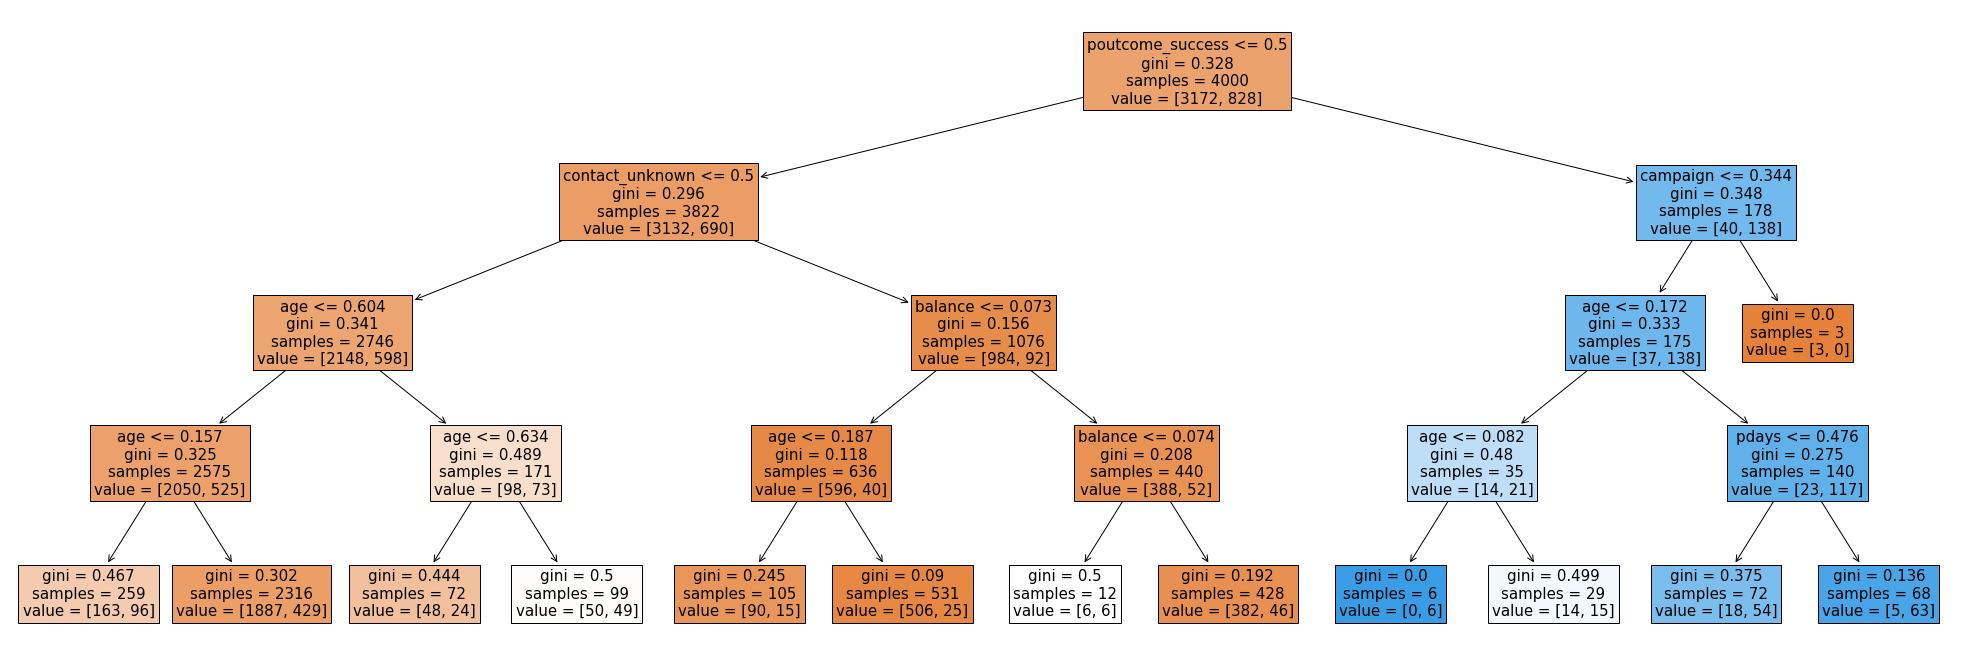

In [93]:
features_names=[i for i in X_train.columns]
plt.figure(figsize=(35,12))  # set plot size (denoted in inches)
tree.plot_tree(cldt,max_depth=4, fontsize=15, filled=True, feature_names=X.columns)
plt.show()


In [94]:
important=cldt.feature_importances_
for col,val in sorted(zip(X.columns,cldt.feature_importances_),key=lambda x:x[1], reverse=True):
  print(col, val)

poutcome_success 0.6028485547608561
age 0.20634191373242683
contact_unknown 0.13552954477536316
balance 0.02598814494699078
campaign 0.01837867391102896
pdays 0.010913167873334205
day 0.0
previous 0.0
job_blue-collar 0.0
job_entrepreneur 0.0
job_housemaid 0.0
job_management 0.0
job_retired 0.0
job_self-employed 0.0
job_services 0.0
job_student 0.0
job_technician 0.0
job_unemployed 0.0
marital_married 0.0
marital_single 0.0
education_secondary 0.0
education_tertiary 0.0
housing_yes 0.0
loan_yes 0.0
contact_telephone 0.0


#Section C-Model evaluation

In [95]:
from sklearn.ensemble import RandomForestClassifier

clrf=RandomForestClassifier(max_depth=4, n_estimators=100)

print("Accuracy:",np.mean(cross_val_score(clrf, X, y, scoring='accuracy', cv=folds)))
print('Precision', np.mean(cross_val_score(clrf, X, y, scoring='precision', cv=folds)))
print('Recall', np.mean(cross_val_score(clrf, X, y, scoring='recall', cv=folds)))

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

Accuracy: 0.8172499999999999


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

Precision 0.7781893140648053


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

Recall 0.16453623503878798


In [96]:
from sklearn.linear_model import LogisticRegression
folds = KFold(n_splits=3, shuffle=True)

cll=LogisticRegression(max_iter=1000)

print("Accuracy:",np.mean(cross_val_score(cll, X, y, scoring='accuracy', cv=folds)))
print('Precision', np.mean(cross_val_score(cll, X, y, scoring='precision', cv=folds)))
print('Recall', np.mean(cross_val_score(cll, X, y, scoring='recall', cv=folds)))


Accuracy: 0.8172552883348274


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Precision 0.7651921470342523


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Recall 0.1745894552139382


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [97]:
from pandas.core.common import random_state
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 27)

print("Accuracy:",np.mean(cross_val_score(knn, X, y, scoring='accuracy', cv=folds)))
print('Precision', np.mean(cross_val_score(knn, X, y, scoring='precision', cv=folds)))
print('Recall', np.mean(cross_val_score(knn, X, y, scoring='recall', cv=folds)))

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.8069982263181986


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

Precision 0.6998643147896879


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Recall 0.13072656381206568


In [98]:

clrf.fit(X_train,y_train)
cll.fit(X_train,y_train)
knn.fit(X_train,y_train)

<ipython-input-98-243c6916b4c9>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clrf.fit(X_train,y_train)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=27)

In [99]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
clrfcm = confusion_matrix(y_test,clrf.predict(X_test))
clknncm = confusion_matrix(y_test,knn.predict(X_test))
cllcm = confusion_matrix(y_test,cll.predict(X_test))
print(clrfcm)
print(clknncm)
print(cllcm)

[[799  10]
 [161  30]]
[[800   9]
 [173  18]]
[[797  12]
 [160  31]]


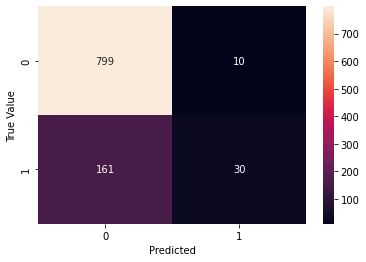

In [100]:

sns.heatmap(clrfcm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

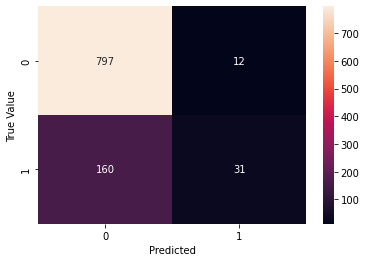

In [101]:

sns.heatmap(cllcm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

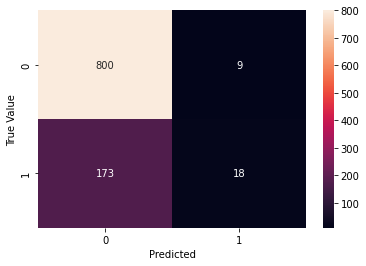

In [102]:
sns.heatmap(clknncm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

In [103]:
y_pred=clrf.predict(X)
print("Classification Report: for rf  \n", classification_report(y_test,clrf.predict(X_test)))
y_pred=cll.predict(X)
print("Classification Report: for ll \n", classification_report(y_test,knn.predict(X_test)))
y_pred=knn.predict(X)
print("Classification Report: for  knn \n", classification_report(y_test,cll.predict(X_test)))

Classification Report: for rf  
               precision    recall  f1-score   support

           0       0.83      0.99      0.90       809
           1       0.75      0.16      0.26       191

    accuracy                           0.83      1000
   macro avg       0.79      0.57      0.58      1000
weighted avg       0.82      0.83      0.78      1000

Classification Report: for ll 
               precision    recall  f1-score   support

           0       0.82      0.99      0.90       809
           1       0.67      0.09      0.17       191

    accuracy                           0.82      1000
   macro avg       0.74      0.54      0.53      1000
weighted avg       0.79      0.82      0.76      1000

Classification Report: for  knn 
               precision    recall  f1-score   support

           0       0.83      0.99      0.90       809
           1       0.72      0.16      0.26       191

    accuracy                           0.83      1000
   macro avg       0.78      

#Section E- Model Implementation and optimising

In [104]:
model_param = {
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators': [10, 50, 100, 130], 
            'criterion': ['gini', 'entropy'],
            'max_depth': range(3, 4), 
            'max_features': ['auto', 'log2']
        }
    }
}

scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

scores

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[{'model': 'RandomForestClassifier',
  'best_score': 0.8172499999999999,
  'best_params': {'criterion': 'gini',
   'max_depth': 3,
   'max_features': 'auto',
   'n_estimators': 100}}]

In [105]:
rf = RandomForestClassifier(criterion= 'gini', max_depth= 3, max_features= 'auto', n_estimators=100)
rf.fit(X, y)
y_pred=rf.predict(X)
Accuracy = metrics.accuracy_score(y, y_pred)
print(Accuracy)

<ipython-input-105-65d0e02bc919>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X, y)


0.81875


In [106]:

rfcm = confusion_matrix(y,y_pred)
print(rfcm)
print("Classification Report: for rf  \n", classification_report(y,y_pred))

[[3142   30]
 [ 695  133]]
Classification Report: for rf  
               precision    recall  f1-score   support

           0       0.82      0.99      0.90      3172
           1       0.82      0.16      0.27       828

    accuracy                           0.82      4000
   macro avg       0.82      0.58      0.58      4000
weighted avg       0.82      0.82      0.77      4000



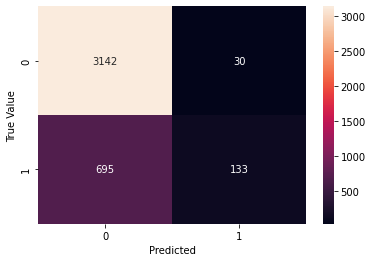

In [107]:
sns.heatmap(rfcm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

#Downloading the model for future use

In [111]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(rf, open(filename, 'wb'))

In [109]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.832
